###  Cifar10 is datasets
The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
#### Read More About Data Sets: https://en.wikipedia.org/wiki/CIFAR-10


In [1]:
import tensorflow as tf
# Import Sequential model from keras
from tensorflow.keras import Sequential
# Import layers
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPool2D,Dropout 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data() 

In [5]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
X_test.shape

(10000, 32, 32, 3)

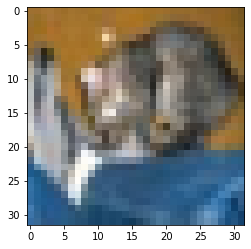

In [10]:
plt.imshow(X_test[0])

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

array start from 0 t0 9 so y_test[0]=3 means it is cat image

### Build CNN model

In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))         

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [15]:
history=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 135s 27ms/step - loss: 1.3699 - sparse_categorical_accuracy: 0.5134 - val_loss: 1.1253 - val_sparse_categorical_accuracy: 0.6056
Epoch 2/10
5000/5000 [==============================] - 142s 28ms/step - loss: 1.0635 - sparse_categorical_accuracy: 0.6244 - val_loss: 1.0247 - val_sparse_categorical_accuracy: 0.6389
Epoch 3/10
5000/5000 [==============================] - 140s 28ms/step - loss: 0.9431 - sparse_categorical_accuracy: 0.6668 - val_loss: 0.9704 - val_sparse_categorical_accuracy: 0.6587
Epoch 4/10
5000/5000 [==============================] - 140s 28ms/step - loss: 0.8581 - sparse_categorical_accuracy: 0.6970 - val_loss: 0.9192 - val_sparse_categorical_accuracy: 0.6739
Epoch 5/10
5000/5000 [==============================] - 141s 28ms/step - loss: 0.7843 - sparse_categorical_accuracy: 0.7226 - val_loss: 0.9312 - val_sparse_categorical_accuracy: 0.6723
Epoch 6/10
5000/5000 [==============================] - 140s 28ms/step - lo

- Validation accuracy is less than training(sparse_categorical_accuracy) then it is case of "OVERFITING".
- If validation accuracy is greater than training accuracy than it is case of "UNDERFITING".

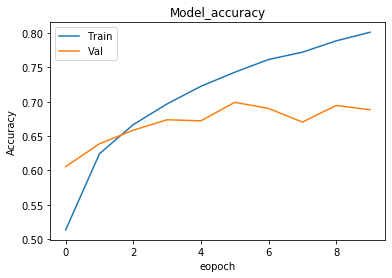

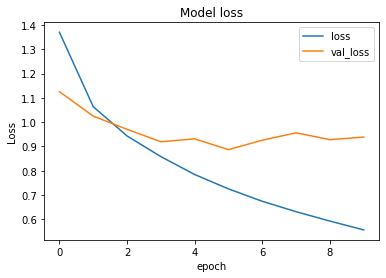

In [17]:
# ploting training and validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('eopoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

# ploting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'],loc='upper right')

In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [22]:
y_pred = model.predict_classes(X_test)


In [23]:
y_pred

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [24]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [25]:
mat = confusion_matrix(y_test,y_pred,labels)
mat

array([[721,  24,  56,  14,  18,   7,  24,  11,  61,  64],
       [ 15, 799,  14,   5,   1,   3,   7,   1,  20, 135],
       [ 75,   5, 580,  33,  85,  70,  95,  29,  12,  16],
       [ 32,  11,  81, 429,  84, 183, 113,  25,  11,  31],
       [ 22,   6,  94,  52, 629,  25, 111,  49,   7,   5],
       [ 13,   8,  76, 167,  69, 560,  46,  46,   6,   9],
       [  3,   6,  31,  43,  37,  19, 856,   2,   3,   0],
       [ 27,   4,  48,  33,  75,  54,  20, 702,   6,  31],
       [ 68,  48,  15,  10,   7,   5,  13,   4, 783,  47],
       [ 26,  73,   7,  12,   6,   6,  12,  10,  22, 826]], dtype=int64)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24ca5b0e248>)

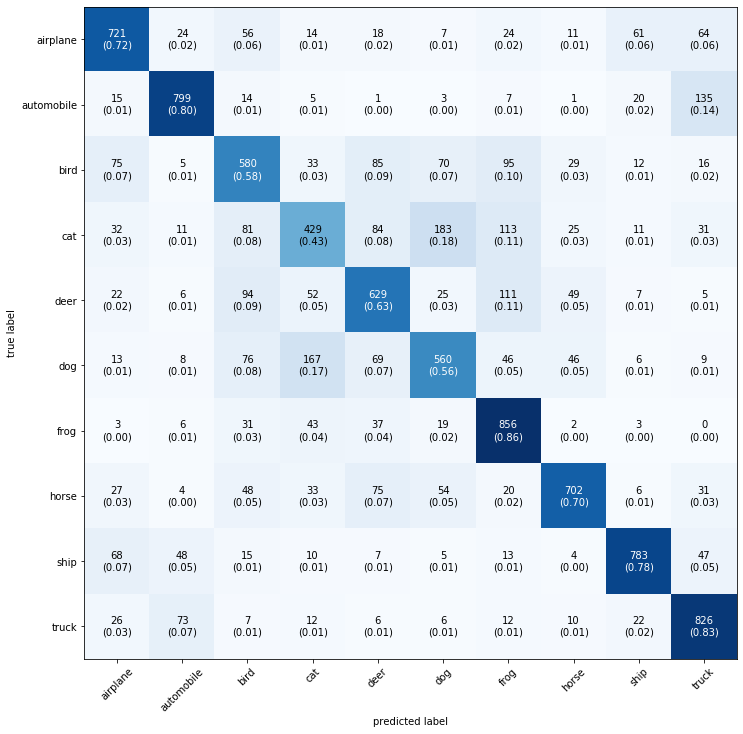

In [32]:
plot_confusion_matrix(mat,figsize=(12,12),class_names=classes_name,show_normed=True)